In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [5]:
data=pd.read_csv("Voice-Dataset.csv")

In [6]:
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [7]:
data.shape

(3168, 21)

In [8]:
data.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

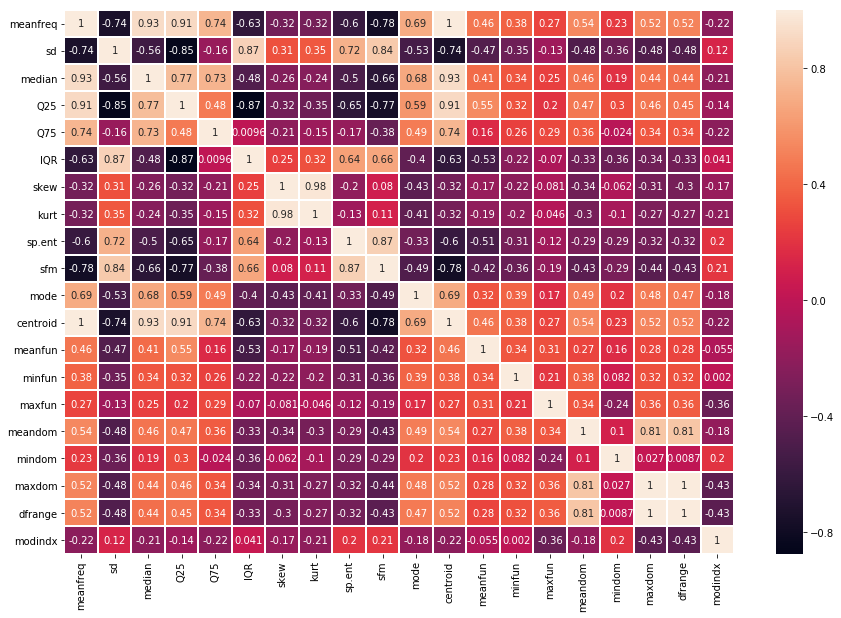

In [9]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,linewidths="1",linecolor="w")

In [10]:
data["label"].head()

0    male
1    male
2    male
3    male
4    male
Name: label, dtype: object

In [11]:
le = preprocessing.LabelEncoder()

In [12]:
data["label"]=le.fit_transform(data["label"])

In [13]:
data["label"].unique()

array([1, 0], dtype=int64)

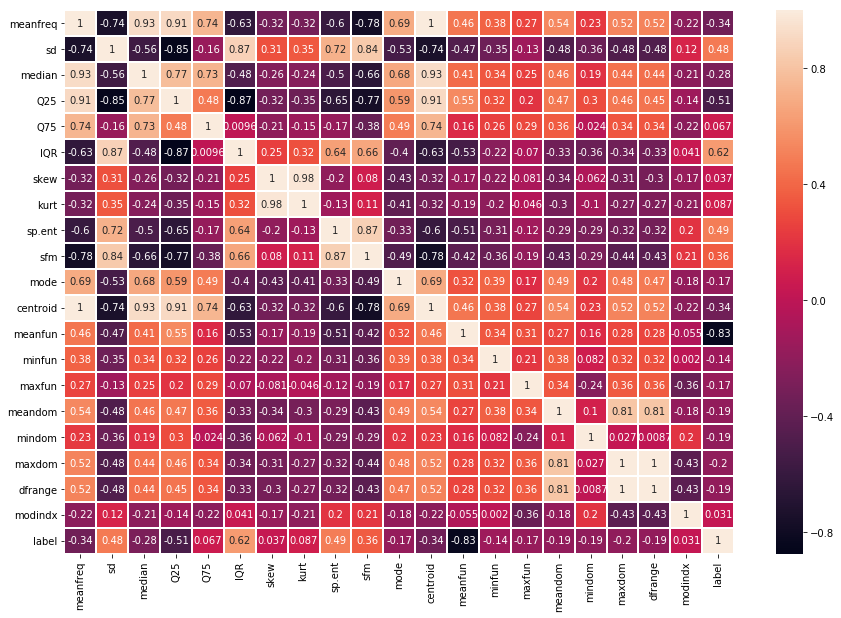

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,linewidths="1",linecolor="w")

In [15]:
Training_data=data[["meanfun","Q25","IQR"]]

In [16]:
output_data=data["label"]

In [17]:
train_x,test_x,train_y,test_y=train_test_split(Training_data,output_data,test_size=0.3,random_state=5)
train_x.head()

,meanfun,Q25,IQR
1617,0.131372,0.173587,0.046702
2973,0.145856,0.147706,0.059083
869,0.101207,0.098136,0.113505
1913,0.138373,0.022843,0.104794
2603,0.182595,0.220870,0.035362


In [18]:
model=LogisticRegression()

In [19]:
model.fit(train_x,train_y)

c:\users\ashish\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
predictions=model.predict(test_x)

In [21]:
predictions[:5]

array([0, 1, 0, 1, 1])

In [22]:
score=accuracy_score(predictions,test_y)

In [23]:
score

0.907465825446898

In [24]:
kn_model=KNeighborsClassifier()

In [25]:
param={"n_neighbors":[5,7,10,15,18]}

In [26]:
grid_search=GridSearchCV(KNeighborsClassifier(),param_grid=param)

In [27]:
grid_search.fit(train_x,train_y)

c:\users\ashish\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [5, 7, 10, 15, 18]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [28]:
grid_pred=grid_search.predict(test_x)

In [29]:
grid_score=accuracy_score(grid_pred,test_y)

In [30]:
grid_score

0.9747634069400631

In [31]:
grid_search.best_params_

{'n_neighbors': 7}

In [36]:
submission=pd.DataFrame()

In [37]:
submission.to_csv(" Voice_Classificatio.csv ")